# Mise en place de l'environnement


In [1]:
 pip install pmdarima

In [2]:
# Import de librairies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller
from scipy.stats import f

import pmdarima as pmd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [3]:
# Ajustements à l'environnement google colab
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


# Import des données et vérification des valeurs manquantes ou nulles 

In [4]:
# Import des données et visualisation des première lignes 
df = pd.read_excel("/content/Drive/MyDrive/Projet Econométrie/quarterly.xls")
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [5]:
# Valeurs Na 
df.isna().sum()

DATE        0
FFR         0
Tbill       0
Tb1yr       0
r5          0
r10         0
PPINSA      0
Finished    0
CPI         0
CPICORE     0
M1NSA       0
M2SA        0
M2NSA       0
Unemp       0
IndProd     0
RGDP        0
Potent      0
Deflator    0
Curr        0
dtype: int64

In [6]:
# Valeurs nulles 
df.isnull().sum()

DATE        0
FFR         0
Tbill       0
Tb1yr       0
r5          0
r10         0
PPINSA      0
Finished    0
CPI         0
CPICORE     0
M1NSA       0
M2SA        0
M2NSA       0
Unemp       0
IndProd     0
RGDP        0
Potent      0
Deflator    0
Curr        0
dtype: int64

Nous pouvons remarqur qu'il n'y a pas de valeur manquantes ou valeurs nulles dans la série. 

# Etude de la série de CPI


**Définition du CPI**:  En anglais, Consumer Price Index, ou indice des prix à la consommation, est un indicateurs économique, qui permet d'étudier l'évolution du prix d'un panier  type de biens de consommation et de services achetés par les ménages (ex: transport, alimentation, services médicaux..). Les changement du CPI sont associés à des changement du coût de la vie. Il est également utilisé pour étudier des périodes d'inflation et de déflation. Pour en apprendre plus, voir le lien ci-dessous.

**Source:** https://www.investopedia.com/terms/c/consumerpriceindex.asp

## Description et visualisation de la série.

In [7]:
# Série de CPI
CPI = df['CPI']

In [8]:
# Description des valeurs prises par le CPI
CPI.describe()

count    212.000000
mean     113.182028
std       65.310267
min       29.400000
25%       43.705000
50%      109.635000
75%      167.507500
max      231.280000
Name: CPI, dtype: float64

In [9]:
# Ajustement du format de la date
date = df['DATE']
date = pd.to_datetime(date)

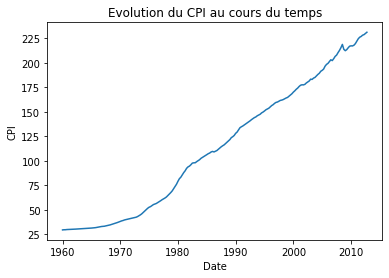

In [10]:
# Graphique du CPI en fonction du temps 
plt.plot(date, CPI);
plt.title("Evolution du CPI au cours du temps")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.show()

Nous pouvons remarquer que la série a une tendance générale croissante, ce qui est en cohérence avec le développement économique. La série est donc clairement non stationnaire.

## Stationnarisation de la série de CPI 

**Définition de quelques termes:**

- La **tendance** de la série temporelle caractérise son évolution générale durant de le temps. 

- La **stationnarité** d'une série temporelle est définie par une moyenne constante durant le temps, et la non accumulation des effets précédents. 

- **Stationnariser une série:** Est l'action de rendre une série stationnaire, en retirant le terme de tendance. Ceci permet de contrôler les auto-corrélations de la série.

Pour stationnariser la série, plusieurs types de tendances vont être étudiés: tendance linéaire, quadration, log, et exponentielles. Nous déterminerons par la suite la tendance la plus édéquate à la série.

### Tendance Linéaire

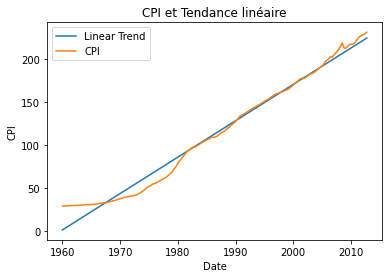

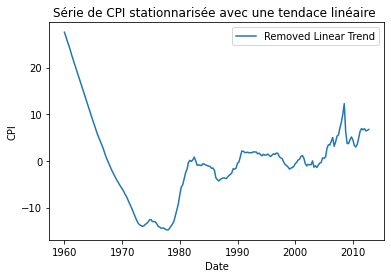

Le coefficient de détermination obtenu est: 0.9828376652371925


In [11]:
# Construction de la feature matrix 
X = [i for i in range(len(CPI))]
X = np.reshape(X, (len(X), 1))

# Apprentissage du modèle 
model = LinearRegression(fit_intercept = True)
model.fit(X, CPI)
linear_trend = model.predict(X)

# Graphique de la tendance 
plt.title("CPI et Tendance linéaire")
plt.plot(date, linear_trend, label = 'Linear Trend')
plt.plot(date, CPI, label = 'CPI')
plt.legend()
plt.ylabel("CPI")
plt.xlabel('Date')
plt.show()

# Graphique des résidus 
plt.title("Série de CPI stationnarisée avec une tendace linéaire ")
plt.plot(date, CPI - linear_trend, label = 'Removed Linear Trend')
plt.legend()
plt.ylabel("CPI")
plt.xlabel('Date')
plt.show()

print("Le coefficient de détermination obtenu est:",
      r2_score(CPI, linear_trend))

La stationnarisation est non satisfaisante. En effet, il réside une tendance décroissante au niveau des résidus entre 1960 et 1970. De plus, les résidus ne sont pas répartis aléatoirement autour de zéro.

### Tendance Quadratique d'ordre 2

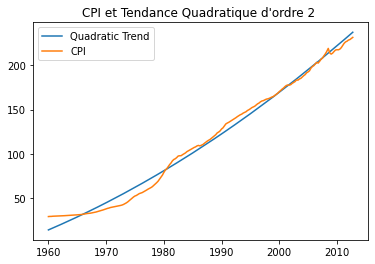

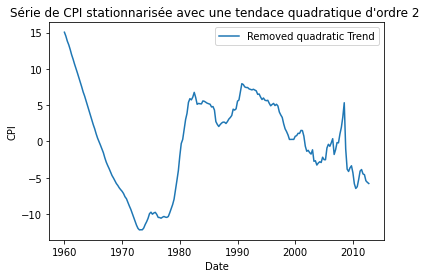

Le coefficient de détermination obtenu est: 0.9904534599108377


In [12]:
# Construction de la feature matrix 
X = [i for i in range(len(CPI))]
X = np.reshape(X, (len(X), 1))

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_deg_2 = poly.fit_transform(X)

# Apprentissage de modèle
model = LinearRegression(fit_intercept= True)
model.fit(X_deg_2, CPI), 
quadratic_trend = model.predict(X_deg_2)

# Graphique de tendance 
plt.title("CPI et Tendance Quadratique d'ordre 2 ")
plt.plot(date, quadratic_trend, label = 'Quadratic Trend')
plt.plot(date, CPI, label = 'CPI')
plt.legend()
plt.show()

# Graphique de résidus 
plt.title("Série de CPI stationnarisée avec une tendace quadratique d'ordre 2 ")
plt.plot(date, CPI - quadratic_trend, label = 'Removed quadratic Trend')
plt.legend()
plt.ylabel("CPI")
plt.xlabel('Date')
plt.show()

print("Le coefficient de détermination obtenu est:",
      r2_score(CPI, quadratic_trend))

La stationnarisation est non satisfaisante, pour les mêmes raisons que la tendance linéaire. 

### Tendance Quadratique d'ordre 4

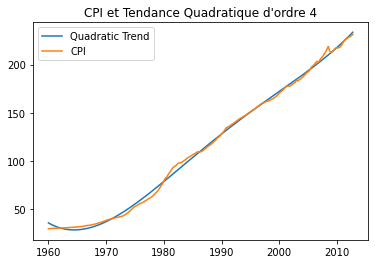

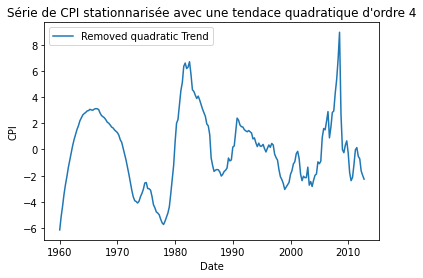

Le coefficient de détermination obtenu est: 0.9981264534424436


In [13]:
# Construction de la feature matrix 
X = [i for i in range(0, len(CPI))]
X = np.reshape(X, (len(X), 1))


poly = PolynomialFeatures(degree = 4, include_bias = False)
X_deg_4 = poly.fit_transform(X)

# Apprentissage de modèle
model = LinearRegression(fit_intercept= True)
model.fit(X_deg_4, CPI), 
quadratic_trend = model.predict(X_deg_4)

# Graphique de tendance 
plt.title("CPI et Tendance Quadratique d'ordre 4")
plt.plot(date, quadratic_trend, label = 'Quadratic Trend')
plt.plot(date, CPI, label = 'CPI')
plt.legend()
plt.show()

# Graphique de résidus 
plt.title("Série de CPI stationnarisée avec une tendace quadratique d'ordre 4")
plt.plot(date, CPI - quadratic_trend, label = 'Removed quadratic Trend')
plt.legend()
plt.ylabel("CPI")
plt.xlabel('Date')
plt.show()


print("Le coefficient de détermination obtenu est:",
      r2_score(CPI, quadratic_trend))

### Tendance Quadratique d'ordre 6

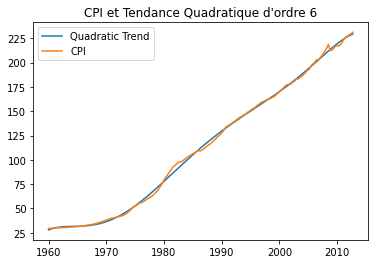

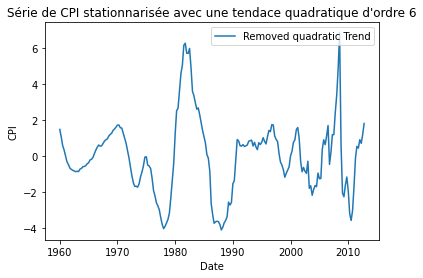

Le coefficient de détermination obtenu est: 0.9989621504553035


In [14]:
# Construction de la feature matrix 
X = [i for i in range(0, len(CPI))]
X = np.reshape(X, (len(X), 1))


poly = PolynomialFeatures(degree = 6, include_bias = False)
X_deg_6 = poly.fit_transform(X)

# Apprentissage de modèle
model = LinearRegression(fit_intercept= True)
model.fit(X_deg_6, CPI), 
quadratic_trend = model.predict(X_deg_6)

# Graphique de tendance 
plt.title("CPI et Tendance Quadratique d'ordre 6")
plt.plot(date, quadratic_trend, label = 'Quadratic Trend')
plt.plot(date, CPI, label = 'CPI')
plt.legend()
plt.show()

# Graphique de résidus 
plt.title("Série de CPI stationnarisée avec une tendace quadratique d'ordre 6")
plt.plot(date, CPI - quadratic_trend, label = 'Removed quadratic Trend')
plt.legend()
plt.ylabel("CPI")
plt.xlabel('Date')
plt.show()


print("Le coefficient de détermination obtenu est:",
      r2_score(CPI, quadratic_trend))

### Stationnarisation logarithmique

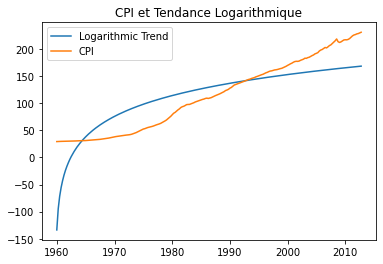

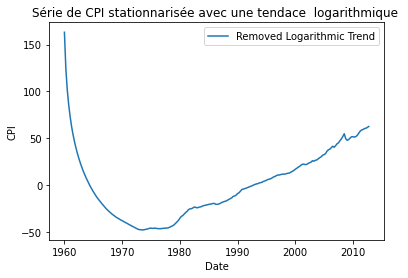

Le coefficient de détermination obtenu est: 0.6832521649598962


In [15]:
# Construction de la fature matrix
X = [np.log(i) for i in range(1, len(CPI)+1)]
X = np.reshape(X, (len(X), 1))

# Apprentissage du modèle 
model = LinearRegression(fit_intercept = True)
model.fit(X, CPI), 
log_trend = model.predict(X)


# Graphique tendance et CPI
plt.title("CPI et Tendance Logarithmique")
plt.plot(date, log_trend, label = 'Logarithmic Trend')
plt.plot(date, CPI, label = 'CPI')
plt.legend()
plt.show()

# Graphiques des erreurs 
plt.title("Série de CPI stationnarisée avec une tendace  logarithmique ")
plt.plot(date, CPI - log_trend, label = 'Removed Logarithmic Trend')
plt.legend()
plt.ylabel("CPI")
plt.xlabel('Date')
plt.show()


print("Le coefficient de détermination obtenu est:",
      r2_score(CPI, log_trend))

### Stationnarisation exponnentielle

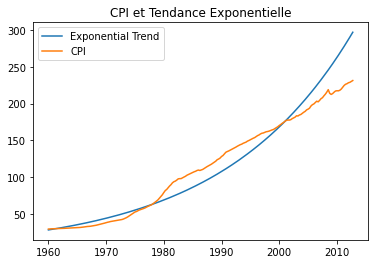

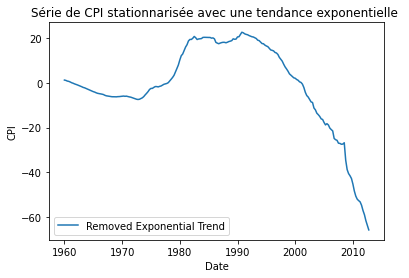

Le coefficient de détermination obtenu est: 0.9607548822574083


In [16]:
# Construction de la fature matrix
df["time"]=[i for i in range(0, df.shape[0])]
df["const"] = 1
X = df[["const", "time"]]
log_y = np.log(CPI)

# Apprentissage du modèle 
model_log=sm.OLS(log_y,X)
results= model_log.fit()
log_trend = np.exp(results.fittedvalues)# model_log.predict(X)


# Graphique tendance et CPI
plt.title("CPI et Tendance Exponentielle")
plt.plot(date, log_trend, label = 'Exponential Trend')
plt.plot(date,CPI, label = 'CPI')
plt.legend()
plt.show()

# Graphiques des erreurs 
plt.title("Série de CPI stationnarisée avec une tendance exponentielle ")
plt.plot(date,  CPI- log_trend, label = 'Removed Exponential Trend')
plt.legend()
plt.ylabel("CPI")
plt.xlabel('Date')
plt.show()


print("Le coefficient de détermination obtenu est:",
     results.rsquared)

### Stationnarisation avec moyenne mobile 

- **Moyenne mobile**: La moyenne mobile, ou moyenne glissante, (moving average), est une moyenne statistique adaptée aux analyse de séries temporelles. La moyenne est réalisé sur les valeur précédentes et/ou suivantes du point en considération. Cette moyenne est appelée mobile car calculée pour chaque pas de temps. Pour plus d'informations, voir la source.

**Source:** 
https://fr.wikipedia.org/wiki/Moyenne_mobile

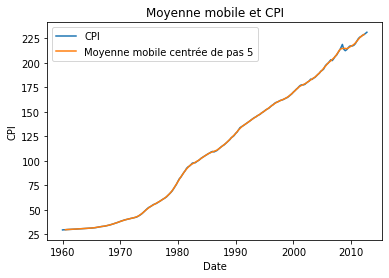

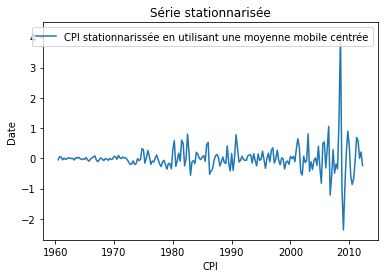

In [17]:
# Calcul de moyenne mobile centrée 5x5
CPI_rm_5 = CPI.rolling(window = 5,
                       center  = True).mean() 

# Visualisation des deux séries 
plt.plot(date, CPI, label = 'CPI')
plt.plot(date, CPI_rm_5, label = "Moyenne mobile centrée de pas 5")
plt.title("Moyenne mobile et CPI")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.legend()
plt.show()

# Série stationnarisée  avec moyenne mobile
CPI_detrended_rm_5 = CPI - CPI_rm_5
plt.plot(date, CPI_detrended_rm_5, 
         label = "CPI stationnarissée en utilisant une moyenne mobile centrée")
plt.title("Série stationnarisée")
plt.legend()
plt.ylabel("Date")
plt.xlabel("CPI")
plt.show()

# Etude de l'inflation

**Inflation**:  L'inflation caractérise la décroissance du pouvoir d'achat d'une monaie au cours du temps. 
L'inflation peut être étudiée ent utilisant la le CPI, et la formule suivante: 

$$\frac{( CPI_{t+1} - CPI_t )}{CPI_t}*100*4$$

Pour plus d'informations se référer à la source ci-dessous.

**Source:** https://www.investopedia.com/terms/i/inflation.asp

## Calcul et description de l'inflation

In [18]:
inflation = df['CPI'].pct_change()*4*100  #pourcentage et taux annuel 

In [19]:
inflation.describe()

count    211.000000
mean       3.941158
std        3.098014
min       -9.156538
25%        2.167980
50%        3.430709
75%        4.885224
max       15.783243
Name: CPI, dtype: float64

## Evolution de l'inflation au cours du temps 

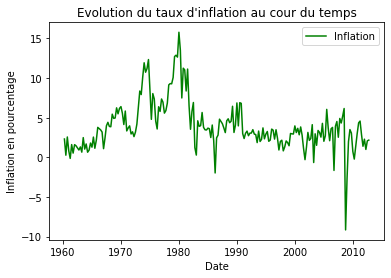

In [20]:
plt.plot(date, inflation, label = "Inflation", c = 'green')
plt.title("Evolution du taux d'inflation au cour du temps")
plt.ylabel('Inflation en pourcentage')
plt.xlabel("Date")
plt.legend()
plt.show()

Entre 1960 et 1980, on remarque une forte augmentation  générale du taux d'inflation. Puis une importante baisse générale entre 1980 et 1990.
Pour ensuite se stabiliser jusqu'en 2008 où l'on observe une chute du taux d'inflations, et une variation importante. 
Ce graphique est assez parlant, en effet on peut y voir different événement marquant de l'histoire economique americaine, en observant les différentes régions de grandes variations.


## Etude des autocorrélogrammes (ACF) et autocorrélogrammes partiels (PACF) de l'inflation


**Quelques définitions:**
- **Autocorrelation Function ACF**: Correspond aux correlations de la série suivant ses propre lags. Soit k un lag de la série $y$, le coefficient associé au lag k correspond à $Cov(y_{t+k}, y_t)$

- **Partial Autocorrelation function PACF**: Correspond aux correlations entre la série avec en fonction de ses lags, en prenant des intervalles intermédiaires. Dans ce cas, nous prenons en compte une régression linéaire. 
Pour le lag k, on considère la $Cov(y_{t+k}, y_t)$  où $y_{t+k}$ est défini tel quel:
$$y_{t+k} = \beta_0 + \beta_1 y_{t-k+1} + ... + \beta_k y_{t}  + \epsilon_t$$

avec $\epsilon_t$ correspondant au résidu à l'instant t.  


In [21]:
inflation  = inflation[1:]

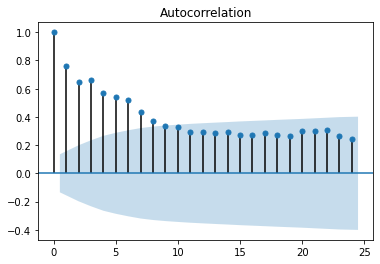

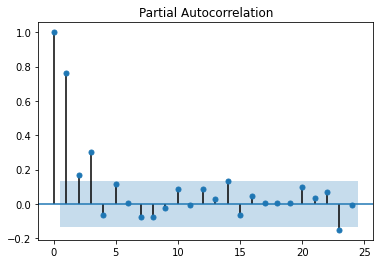

In [22]:
plot_acf(inflation, alpha = 0.05)
plt.show()

plot_pacf(inflation, alpha = 0.05)
plt.show()

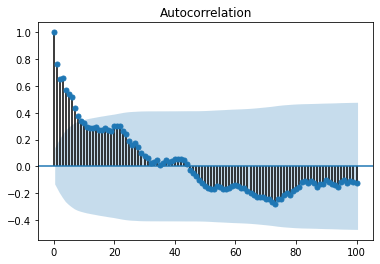

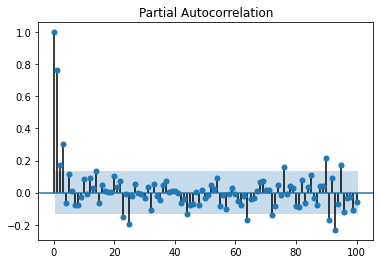

In [23]:
plot_acf(inflation, alpha = 0.05, lags = 100)
plt.show()

plot_pacf(inflation, alpha = 0.05, lags = 100)
plt.show()

**Les graphiques:** 

Dans les deux cas, l'axe **y** correspond à la **correlation entre la série et un lag donné**, et l'axe x correspond au lag étudié. 

Le **cône bleu** présent dans les des graphiques correspond à l'**intervalle de confiance** à 95% par défaut. Si le point est en dehors du cône (dans la zone blance), nous pouvons en conclure qu'à 5% de risque, le lag est significativement impactant sur la série, et donc corrélé au signal. Sinon, le lag est dans la zone bleu, et nous pouvons interpréter cela, comme une non significativité de ce lag particulier, et donc l'ignorer dans le cadre de la modélisation. 

**Liens utiles:** 
- https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711
- https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

**Interprétations des graphiques**:

Sur le premier graphique de l'ACF, on peut dire que les 8 premiers lags sont significatifs.

Sur le graphique du PACF nous pouvons remarquer que les 3 premiers lags sont significatifs. On peut également remarquer qu'il existe des lags impactans à environs 20 lags d'écarts et 100 lags d'écarts, ce qui pourrait dénoter une certaine cyclicité.

## Stationnarité et Ergodiscité
- **La stationnarité** d’une série temporelle en est une propriété fondamentale. Elle indique si les caractéristiques de celui-ci changent avec le temps ou non. On rappel une serie temporelle ${X_t}_t$ est stationnarité au sens large si $E(X_t)=\mu$ (constante) $\forall t$ et $E(X_t^2) < \infty$ et ne dépend pas du temps t et $cov(X_t,X_{t-k}) = \sigma(k)$ ne dépend egualement pas de t. Il est crucial qu'une serie temporelle soit stationnaire car c'est la  garantit qu'elle présente les mêmes propriétés statistique au cour du temps.
  

- **Ergodicité** en revanche, il suffit essentiellement que $X_t$ et $X_s$ soient asymptotiquement indépendants quand $|t-s|$ tend vers l'infini. En d'autres termes une serie temporelle ${X_t}$ est ergodique si  $cov(X_t,X_{t-k})$ tend verx 0 quand $k$ tend vers $+\infty$. Il est important qu'une serie temporelle soit ergodique car elle  permet notamment de pouvoir utiliser la loi des grands nombres et le théorème de limite centrale. Avec sufisament d’observations on peut atteindre les propriétés théoriques du processus. L'ergodicité permet d'assurer que l'estimateur de la série temporelle est non biaisé, et que donc les paramètres le sont aussi.


  
- **Spurious regression** (régression fallacieuse) désigne une situation dans laquelle l'utilisation de séries temporelles non stationnaires dans une régression linéaire fait apparaître des résultats erronés, trop optimistes, qui font croire à une relation entre les variables alors que ce n'est pas le cas. Souvent les regressions fallacieuses apparaissent lorsqu'il y a une regression d'une marche aléatoire vers une autre marche alétoire indépendante. On remarquera alors que l'estimation du coefficient ne convergera pas vers zéro (la vraie valeur). Au lieu de cela, dans la limite, l'estimation du coefficient
suivre une distribution non dégénérée. La valeur de t sera le plus souvent significatif, et le coefficient de détermination  (R²) élevé. On peut également les retrouver quand les séries sont non stationnaires, et contiennent des tendances stochastiques, ou des tendances similaires.
Il existe cependant des moyens de relever des régressions fallacieuses. Comme par exemple la présence d'une racine unitaire au niveau des résidus. Pour cette raison, il est primordial de valider la stationnarité des résidus. 

**Sources intéressantes:** 
- http://www.fsb.miamioh.edu/lij14/672_2014_s8.pdf
- https://en.wikipedia.org/wiki/Spurious_relationship#:~:text=An%20example%20of%20a%20spurious,between%20independent%20non%2Dstationary%20variables
- https://kidbrooke.com/risk-dictionary/stationarity-and-ergodicity/

## Test de stationnarité

### Explications des tests de stationnarité
Comme expliqué précédemment, la stationnarité est une propriété imprtante pour l'étude d'une série temporelle. 
Il existe plusieurs manière de vérifier la stationnarité d'une série: 
- Visualisation de la série temporelle
- Séparer la série en 2, et caculer les statistiques de moyenne de variance et d'autocorrélation, et comparer les deux résultats statistiques obtenus. S'ils sont significativement différents, il sera suggéré que la série est non stationnaire. 
- Utiliser les méthodes quantitatiques. En utilisant par exemple les tests de racines unitaires Parmi ces tests, nous pouvons noter:
  - Augmented Dickey Fuller test (ADF Test)
  - Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
  - Philips Perron test (PP Test)


Augmented Dickey Fuller es le plus communément utilisé. Dans le cadre de ce test, l'hypothèse nulle H0 consiste a affirmer que la série temporelle possède une racine unitaire, et est non stationnarire. Si la p-value du tst ADF est inférieure au risque, l'hypotèse nulle est alors acceptée.

**Plus d'informations sur:**  https://www.kaggle.com/prashant111/complete-guide-on-time-series-analysis-in-python

### Réalisation du test Augmented Dickey Fuller test (ADF Test)

In [24]:
inflation = inflation.dropna()

In [25]:
adf_inf_aic = adfuller(inflation, 
                        autolag='AIC',  
                       regression = 'c') 

#### From https://www.machinelearningplus.com/time-series/time-series-analysis-python/
print(f'ADF Statistic: {adf_inf_aic[0]}')
print(f'p-value: {adf_inf_aic[1]}')
for key, value in adf_inf_aic[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
####

print("Nombre de lags minimisant l'AIC: ", adf_inf_aic[2])

ADF Statistic: -2.9190558143372347
p-value: 0.04317651687154687
Critial Values:
   1%, -3.4621857592784546
Critial Values:
   5%, -2.875537986778846
Critial Values:
   10%, -2.574231080806213
Nombre de lags minimisant l'AIC:  2


On a un P-value ≈ 0.04 < 0.05,  H0  est rejeté. D'après ce test, la série temporelle qui représente l'inflation est semble stationnaire. Or la visualisation de la série semble suggérer une conclusion opposée. Je pense que cela est dû au type de régression choisie par défaut au niveau du test, qui considère seulement la constante. A mon sens il faudrait inclure la tendance également au test. Ceci est réalisé ci-dessous: 


In [26]:
adf_inf_aic = adfuller(inflation, 
                        autolag='AIC',  
                       regression = 'ct') 

#### From https://www.machinelearningplus.com/time-series/time-series-analysis-python/
print(f'ADF Statistic: {adf_inf_aic[0]}')
print(f'p-value: {adf_inf_aic[1]}')
for key, value in adf_inf_aic[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
####

print("Nombre de lags minimisant l'AIC: ", adf_inf_aic[2])

ADF Statistic: -3.1334995610190464
p-value: 0.09848521134086352
Critial Values:
   1%, -4.002966509244673
Critial Values:
   5%, -3.43181159172131
Critial Values:
   10%, -3.139573978276485
Nombre de lags minimisant l'AIC:  2


On a un P-value ≈ 0.09 > 0.05,  H0  est acceptée. D'après ce test, la série temporelle qui représente l'inflation est donc non stationnaire. 

## Modélisation AR(p) de l'inflation

Pour ce test nous allons d'abord tester plusieurs valeurs pour déterminer empiriquement le meilleur nombre de lags. Nous utiliserons également  le modèle auto arima.
Nous confiremerons ensuite les résultats en utilisant les graphiques d'ACF et PACF. Nous déterminerons ensuite les coefficients du modèle.

### En testant plusieurs paramètres 

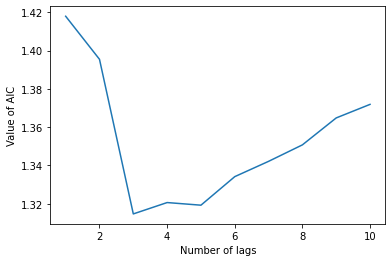

 Le meilleur nombre de lags pour minimiser l'AIC est: 3


In [27]:
aic = []
for p in range(1,11):
    model_AR = smt.AR(inflation).fit(maxlag = p)
    aic.append(model_AR.aic)
plt.plot(range(1,11), aic ) 
plt.xlabel("Number of lags")
plt.ylabel("Value of AIC")
plt.show()   

best_param_aic = aic.index(min(aic)) +1
print(" Le meilleur nombre de lags pour minimiser l'AIC est:",
      best_param_aic)

### En utilisant auto arima

In [28]:
def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [29]:
arima_model = arimamodel(inflation)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=884.783, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=918.234, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=904.290, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=887.024, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=916.234, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=880.209, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=878.524, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=880.462, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=876.817, Time=0.54 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=878.941, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=876.298, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=879.052, Time=0.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=879.623, Time=0.38 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=878.278, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=878.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  211
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -431.149
Date:                Sun, 16 May 2021   AIC                            874.298
Time:                        23:10:21   BIC                            894.381
Sample:                             0   HQIC                           882.417
                                - 211                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1403      0.244      0.574      0.566      -0.339       0.619
ar.L2          0.1651      0.180      0.916      0.360      -0.188       0.518
ar.L3          0.2942      0.054      5.451      0.000       0.188       0.400
ma.L1         -0.5196      0.267     -1.942      0.052      -1.044       0.005
ma.L2         -0.3866      0.240     -1.610      0.107      -0.857       0.084
sigma2         3.5431      0.143     24.821      0.000       3.263       3.823
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2055.37
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.77   Skew:                            -2.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

D'après le modeèle ARMA, le paramètre p minimisant au mieux l'AIC est p = 3.

### Confrontation avec les résultats d'ACF et PACF

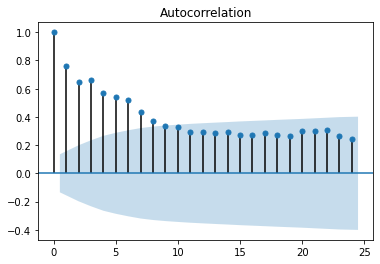

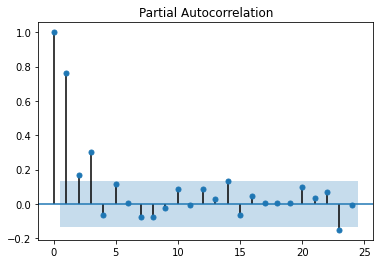

In [30]:
plot_acf(inflation, alpha = 0.05)
plt.show()

plot_pacf(inflation, alpha = 0.05)
plt.show()

Les graphes ACF et PACF confirment les résultats. En effet, on remarque une chute brutale des coefficients après le 3ème lags, et une non significativité de ces derniers, au vu de leurs présence  en dehors de la zone du cône bleu dans le PACF.

### Détermination des paramètres 

In [31]:
ar_inf = smt.AR(inflation, ).fit(maxlag = best_param_aic)
print("Les paramètres du modèle sont: ")
print(ar_inf.params)
print(ar_inf.summary())

Les paramètres du modèle sont: 
const     0.546243
L1.CPI    0.582774
L2.CPI   -0.018421
L3.CPI    0.297893
dtype: float64
                               AR Model Results                               
Dep. Variable:                      C  -                  P                  I
Model:                          AR(3)   Log Likelihood                -426.870
Method:                          cmle   S.D. of innovations              1.884
Date:                Sun, 16 May 2021   AIC                              1.315
Time:                        23:10:22   BIC                              1.395
Sample:                             0   HQIC                             1.347
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5462      0.229      2.383      0.017       0.097       0.995
L1.CPI  

On a donc :
$inf_t = 0.546243 + 0.582774* inf_{t-1} -0.018421* inf_{t-2} + 0.297893*inf_{t-3} + \epsilon_t$

# Etude du modèle de Philips

## Visulalisation du rapport entre le chomage et l'inflation

In [32]:
unemployment = df['Unemp']

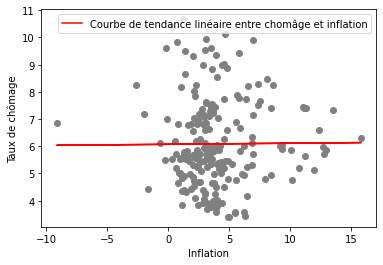

Les paramètes du modèle sont: 
Coefficient directeur :  [0.003977]
Intercept :  6.070818917241152


In [33]:
X = np.array(inflation).reshape(-1, 1)
y =  unemployment[1:]

# Régression entre inflation et unemployment 
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
coef = model.coef_
intercept = model.intercept_

# Visualisation
plt.plot(X,  coef*X + intercept, color='r', label = "Courbe de tendance linéaire entre chomâge et inflation")
plt.scatter(inflation, unemployment[1:], color = 'grey')
plt.xlabel("Inflation")
plt.ylabel("Taux de chômage")
plt.legend()
plt.show()

print("Les paramètes du modèle sont: ")
print("Coefficient directeur : ", coef)
print("Intercept : ",intercept)

## Etude du modèle linéaire 

In [34]:
# Construction des features matrix, et labels 
X = inflation
n  = len(X)
const = np.ones(n)
X = np.column_stack((const, X))
y =  unemployment[1:]

# Application de l'estimateur OLS 
model = sm.OLS(y,X)
results = model.fit()

# Visualisation des résultats
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Sun, 16 May 2021   Prob (F-statistic):              0.912
Time:                        23:10:22   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.0

Nous avons une faible liaison linéaire positive entre Unemp et Inf, ceux qui est étrange compte tenu des travaux d'Alban William Phillips qui lui la supposaient négative. En effet nous avons un coefficient de régression de 0.004 ce qui implique que plus l'inflation augmente, plus le taux de chômage sera important. Cependant nous pouvons remarquer que le coefficient directeur est non significatif au vu de la p-value. Donc le modèle semble ne pas être pertinent, ce qui confirme les résultats obtenus au niveau de la visualisation de la relation (un nuage de point, sans réelle courbe décelable).


## Inspection des résidus

In [35]:
erreurs = results.resid

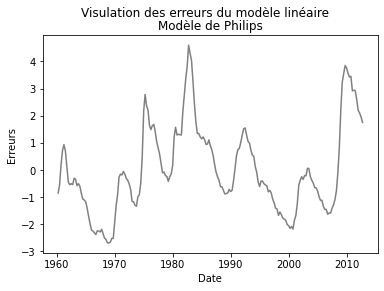

In [36]:
plt.plot(date[1:], erreurs, color = 'grey')
plt.title("Modèle de Philips")
plt.suptitle("Visulation des erreurs du modèle linéaire")
plt.ylabel("Erreurs")
plt.xlabel('Date')
plt.show()

La courbe des résidus semble refléter une non stationnarité et  une autocorrélation. Nous pouvons le remarquer du fait que les valeurs positives resp(négatives) succèdent aux valeurs positives resp(négatives), avec une certaine cyclicité.

**Application du Test de Durbin Watson d'autocorrélation des erreurs**




Le test de Durbin–Watson permet de détecter la présence d'autocorrélation de lag 1 dans les résidus d'une régression linéaire. Il correspond à un test d'autocorrélation des termes d'erreurs d'ordre 1. 

$$u_t = \rho*u_{t-1} + \epsilon_t$$
avec 
$$\epsilon_t  ->  N (0, \sigma_{\epsilon}²)$$

Il s'agira de tester les hypothèses suivantes 
- $H_0 : \rho = 0$
- $H_1 : \rho \ne 0$


La statistique de Durbin Watson (DW) est définie telle que:

$$DW =  \frac{\sum_{t=2}^{n} (û_t - û_{t-1})²}{\sum_{t=1}^{n} û_t²}$$

La statistique de Durbin-Watson  sera toujours comprise entre 0 et 4. 
Une valeur de 2 montre qu'il n'y a pas d'autocorrélation dans l'échantillon. Une valeur entre 0 et 2 montre qu'il y a une autocorrelationon positive, et une valeur entre 2 et 4 montre qu'il y a une auto corrélation négative.

Pour plus d'informations: 
- https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic
- https://www.investopedia.com/terms/d/durbin-watson-statistic.asp
- https://www-perso.gate.cnrs.fr/fournier/Notes_de_cours/Econometrie/2_Autocorrelation.pdf

In [37]:
print("Valeur de la statistique de Drubin Watson :",
      durbin_watson(erreurs))

Valeur de la statistique de Drubin Watson : 0.044194128074711944


Selon le test de durbin watson nous avons une forte autocorrelation positive des erreurs. (Les résultats sont également présent sur le modèle linéaire qui précède).


## Correction de l'autocorrélation des erreurs

On considère le modèle simple: 
- $y_{t-1} = \beta_0 + \beta_1 x_{t-1} + u_{t-1}$
- $y_{t} = \beta_0 + \beta_1 x_{t} + u_t$

On réalise une différence des deux équations :
- $y_{t}  - \rho y_{t-1} = \beta_0(1 - \rho) + \beta_1 (x_t - \rho x_{t-1}) + \epsilon_t,  t>1$

On réalise une régression sans autocorrélation:
- $\widetilde{y}_t = (1 - \rho)\beta_0 + \beta_1\widetilde{x}_t + \epsilon_t, t>1  $

où 
- $\widetilde{x}_t = x_t - \rho x_{t-1}$
- $\widetilde{y}_t = y_t - \rho y_{t-1}$
- $\rho$ correspond au coefficient de corrélation entre les résidus  

- **Détermination de rho**

Coefficient du modèle OLS sans constante. 

In [38]:
erreur_t = list(erreurs)
erreur_t_1 = erreurs.shift(1)

In [39]:
model = sm.OLS(erreur_t, erreur_t_1, missing = 'drop')
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4557.
Date:                Sun, 16 May 2021   Prob (F-statistic):                   6.88e-144
Time:                        23:10:22   Log-Likelihood:                         -70.409
No. Observations:                 210   AIC:                                      142.8
Df Residuals:                     209   BIC:                                      146.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
rho = results.params[0]
print("La valeur du coefficient rho est de:", np.round(rho, 5))

La valeur du coefficient rho est de: 0.97992


In [41]:
y_t = y[1:]
y_t_1  = y.shift(1).dropna()

y_tild = y_t - rho*y_t_1
#y_tild

In [42]:
#y_tild

In [43]:
#X = pd.Series(X["CPI"])
X_t = inflation[1:]
X_t_1 = inflation.shift(1).dropna()

#y[1:]
#y#_t_1  = y.shift(1).dropna()
X_tild = X_t - rho*X_t_1

In [44]:
#X_t = pd.DataFrame(X)
#X_t_1 = pd.DataFrame(X).shift(1)

In [45]:
# Application de l'estimateur OLS 
model = sm.OLS(y_tild, X_tild)
results = model.fit()

# Visualisation des résultats
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Unemp   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.013
Method:                 Least Squares   F-statistic:                              3.661
Date:                Sun, 16 May 2021   Prob (F-statistic):                      0.0571
Time:                        23:10:22   Log-Likelihood:                         -83.092
No. Observations:                 210   AIC:                                      168.2
Df Residuals:                     209   BIC:                                      171.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Test de la stabilité de la relation entre le chômage et l'inflation

Afin d'étudier la stabilité de la relation entre chomâge et inflation nous utiliserons le test de Chow.

In [46]:
split = int(len(inflation )/2)

In [47]:
print("La date du split est: ", date[split])

La date du split est:  1986-04-01 00:00:00


In [48]:
y = unemployment[1:]
X = np.stack([inflation, np.ones(len(inflation))], 
             axis = 1)

In [49]:
model = sm.OLS(y, X)
result = model.fit()
SSR = result.ssr 
SSR

548.9801263315713

In [50]:
model_split_1 = sm.OLS(y[:split], X[:split])
result_split_1 = model_split_1.fit()
SSR_1 = result_split_1.ssr
SSR_1

300.5330748932291

In [51]:
model_split_2 = sm.OLS(y[split:], X[split:])
result_split_2 = model_split_2.fit()
SSR_2 = result_split_2.ssr
SSR_2

238.33623275132666

In [52]:
n = len(X)
k = 4

In [53]:
print("N", n, "K", k)

N 211 K 4


In [54]:
# Test de Chow
F = ((SSR- SSR_1 - SSR_2) / 2) / ((SSR_1 + SSR_2) / (n-k) )
print('Statistique de Fisher:',F)
print('P-value', f.sf(F, 2,n-k))

Statistique de Fisher: 1.9419731635492827
P-value 0.14602473569409172


La p-value est de 0.15, et la statistique de Fisher à 0.14. Donc l'hypothèse H0 ne peut pas être rejettée avec un risque à 5%.
Il n'y a donc pas de changement structurel dans à la date de séparation.

## Détection de point de rupture 

In [55]:
# Modèle Général
model = sm.OLS(y, X)
result = model.fit()
SSR = result.ssr 

Fisher = []
P_value = []

for split in range (25, len(y)-25):
  # Analyse du premier split
  model_split_1 = sm.OLS(y[:split], X[:split])
  result_split_1 = model_split_1.fit()
  SSR_1 = result_split_1.ssr
  
  # Analyse du deuxième split
  model_split_2 = sm.OLS(y[split:], X[split:])
  result_split_2 = model_split_2.fit()
  SSR_2 = result_split_2.ssr

  # Calcul de F_statistique
  F = ((SSR- SSR_1 - SSR_2) / 2) / ((SSR_1 + SSR_2) / (n-k) )
  p =  f.sf(F, 2,n-k)

  # Ajout aux listes
  Fisher.append(F)
  P_value.append(p)

In [56]:
#len(Fisher)

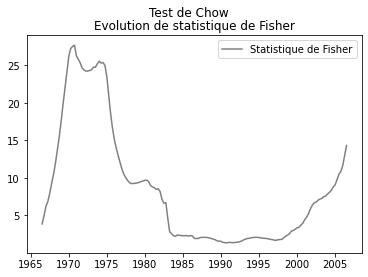

In [57]:
plt.plot(date[26:-25], Fisher, label = 'Statistique de Fisher', color = 'grey')
plt.title("Evolution de statistique de Fisher")
plt.suptitle('Test de Chow')
plt.legend()
plt.show()

In [58]:
# Etude des résultats
date_rupture = date[np.argmax(Fisher)+26]
print("La date de rupture est ", date_rupture)
print('La statistique de Fisher est de ', np.max(Fisher))
print("La p-value associée est ", P_value[np.argmax(Fisher)])

La date de rupture est  1970-10-01 00:00:00
La statistique de Fisher est de  27.68181714348758
La p-value associée est  2.2202618929086777e-11


La valeur la plus élevée de la statistique de Fisher est associée à une p-value très faible (quasi nulle). Donc on rejette l'hypothèse qu'il n'y a pas de changement de structure. Et on détermine le point de rupture principal en 1970. 

## Test de Granger de non causalité

On considère les délais d'ordre 1, 2, 3 et 4. On étudiera donc le moèdle suivant:   

- $ unemp_t =  \beta_1 inf_{t-1}+ \beta_2 inf_{t-2} + \beta_3 inf_{t-3} +  \beta_4 inf_{t-4}+ \\ \delta_1 unemp_{t-1}+ \delta_2 unemp_{t-2} 
        + \delta_3 unemp_{t-3} + \delta_4 inf_{t-4} + coontante
$

Afin d'effectuer le test de Granger, nous devons tester l'hypothèse suivante: 
- $H0: \beta_1 = \beta_2 = \beta_3 = \beta_4 =0 $
- $H1$ : correspond donc au cas où un de ces coefficients $\beta$ est non nul.

In [59]:
# Lags d'inflation
inflation_1 = inflation.shift(1)
inflation_2 = inflation.shift(2)
inflation_3 = inflation.shift(3)
inflation_4 = inflation.shift(4)

In [60]:
# Lags de chomage
unemployment_1 = unemployment.shift(1)
unemployment_2 = unemployment.shift(2)
unemployment_3 = unemployment.shift(3)
unemployment_4 = unemployment.shift(4)

In [61]:
# Construction de feature matrix 
X = pd.concat([inflation_1,inflation_2,inflation_3,inflation_4, 
               unemployment_1, unemployment_2,  unemployment_3, unemployment_4], 
              axis =1)
X.columns =   ["inflation_1","inflation_2","inflation_3","inflation_4", 
               "unemployment_1", "unemployment_2",  "unemployment_3", "unemployment_4"]
X["const"] = 1
X = X.dropna()
X

,inflation_1,inflation_2,inflation_3,inflation_4,unemployment_1,unemployment_2,unemployment_3,unemployment_4,const
5,0.805910,2.568435,0.270544,2.312925,6.80,6.27,5.53,5.23,1
6,-0.134048,0.805910,2.568435,0.270544,7.00,6.80,6.27,5.53,1
7,1.609118,-0.134048,0.805910,2.568435,6.77,7.00,6.80,6.27,1
8,0.534224,1.609118,-0.134048,0.805910,6.20,6.77,7.00,6.80,1
9,1.600534,0.534224,1.609118,-0.134048,5.63,6.20,6.77,7.00,1
...,...,...,...,...,...,...,...,...,...
207,2.867703,4.575958,4.352577,2.990689,9.00,9.03,9.00,9.53,1
208,1.397117,2.867703,4.575958,4.352577,8.67,9.00,9.03,9.00,1
209,2.291052,1.397117,2.867703,4.575958,8.27,8.67,9.00,9.03,1
210,0.998817,2.291052,1.397117,2.867703,8.17,8.27,8.67,9.00,1


In [62]:
y = unemployment[5:]

In [63]:
X.shape

(207, 9)

In [64]:
# Modèle avec toutes les variables
model = sm.OLS(y, X)
result = model.fit()
SSR_1 = result.ssr
SSR_1

11.58738427841523

In [65]:
# Modèle sans lags d'inflation
X_2 = X.drop(["inflation_1","inflation_2","inflation_3","inflation_4"], 
             axis = 1)
model = sm.OLS(y, X_2)
result = model.fit()
SSR_2 = result.ssr
SSR_2

12.47614816930727

In [66]:
# Paramètres
n, p =  X.shape
print("N = ", n,"P = ",  p)

q = X.shape[1] -X_2.shape[1]
print("Paramètre q:", q)

N =  207 P =  9
Paramètre q: 4


In [67]:
# Fisher et P_value
F = ((SSR_2 - SSR_1)/q)/(SSR_1/(n-p))
p_value = f.sf(F,q,n-p)
print('La statistique de Fisher est de ', F)
print("La p-value associée est ", p_value)

La statistique de Fisher est de  3.7966991982053155
La p-value associée est  0.005351957807937182


Au vu de la statistique de Fisher obtenue, et le fait que la p_value soit inférieure à 0.05 donc on rejette l'hypothèse nulle. Les valeurs de des différents lags étudiés de l'inflation ont un impact sur le chômage. 

## Représentation graphique des délais distribués

In [68]:
# Avec les 4 lags étudiés 
X = pd.concat([inflation,inflation_1,inflation_2,inflation_3,inflation_4], 
              axis= 1)
X.columns = ["inflation","inflation_1","inflation_2","inflation_3","inflation_4"] 
X['constante'] = 1    
X = X.dropna()
X

,inflation,inflation_1,inflation_2,inflation_3,inflation_4,constante
5,-0.134048,0.805910,2.568435,0.270544,2.312925,1
6,1.609118,-0.134048,0.805910,2.568435,0.270544,1
7,0.534224,1.609118,-0.134048,0.805910,2.568435,1
8,1.600534,0.534224,1.609118,-0.134048,0.805910,1
9,1.461309,1.600534,0.534224,1.609118,-0.134048,1
...,...,...,...,...,...,...
207,1.397117,2.867703,4.575958,4.352577,2.990689,1
208,2.291052,1.397117,2.867703,4.575958,4.352577,1
209,0.998817,2.291052,1.397117,2.867703,4.575958,1
210,2.080056,0.998817,2.291052,1.397117,2.867703,1


In [69]:
# Résultats du modèle 
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     4.650
Date:                Sun, 16 May 2021   Prob (F-statistic):           0.000487
Time:                        23:10:23   Log-Likelihood:                -383.05
No. Observations:                 207   AIC:                             778.1
Df Residuals:                     201   BIC:                             798.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
inflation      -0.0984      0.058     -1.703      

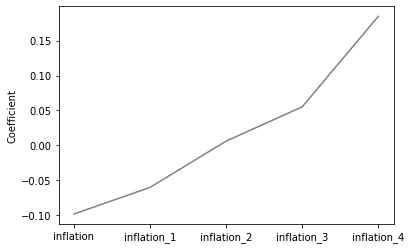

In [70]:
# Visualisation des coefficients
plt.plot(result.params[:-1], color = 'grey');
plt.ylabel("Coefficient")
plt.show()

On peut remarquer que les valeurs sont croissante au fur et à mesure de l'ajout de lags.

## Impact à long de terme de l’inflation sur le chômage

In [71]:
# Calculs de lags additionnels
inflation_5 = inflation.shift(5)
inflation_6 = inflation.shift(6)
inflation_7 = inflation.shift(7)
inflation_8 = inflation.shift(8)
inflation_9 = inflation.shift(9)
inflation_10 = inflation.shift(10)
inflation_11 = inflation.shift(11)
inflation_12 = inflation.shift(12)

In [72]:
# Construction de feature matrix
X = pd.concat([inflation,inflation_1,inflation_2,inflation_3,inflation_4, 
               inflation_5,inflation_6,inflation_7,inflation_8,inflation_9,
               inflation_10,inflation_11,inflation_12], 
              axis= 1)
X.columns = ["inflation","inflation_1","inflation_2","inflation_3","inflation_4", 
             "inflation_5","inflation_6","inflation_7","inflation_8","inflation_9",
               "inflation_10","inflation_11","inflation_12"] 
X['constante'] = 1    
X = X.dropna()
#

In [73]:
y = unemployment[X.index[0]:]

In [74]:
# Modèle
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     8.110
Date:                Sun, 16 May 2021   Prob (F-statistic):           8.79e-13
Time:                        23:10:23   Log-Likelihood:                -337.72
No. Observations:                 199   AIC:                             703.4
Df Residuals:                     185   BIC:                             749.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
inflation       -0.1171      0.052     -2.256   

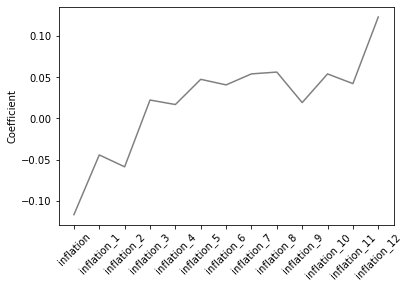

In [75]:
# Visualisation des coefficients
plt.plot(result.params[:-1], color = 'grey');
plt.xticks(rotation =45)
plt.ylabel("Coefficient")
plt.show()